时域采样 [0.         0.39269908 0.78539816 1.17809725 1.57079633 1.96349541
 2.35619449 2.74889357 3.14159265 3.53429174 3.92699082 4.3196899
 4.71238898 5.10508806 5.49778714 5.89048623]
采样点个数： 16
原始信号 [ 0.00000000e+00  3.82683432e-01  7.07106781e-01  9.23879533e-01
  1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01]
频域信号 [-6.22374531e-18+0.00000000e+00j -7.01040876e-17-5.00000000e-01j
 -2.66917300e-17-4.12846664e-17j  6.22374531e-18-3.46944695e-17j
  1.45929364e-17-3.46944695e-17j  6.22374531e-18-3.46944695e-17j
  4.19998150e-17-2.74068786e-17j  2.70404270e-17+0.00000000e+00j
  7.65404249e-18+0.00000000e+00j  2.70404270e-17+0.00000000e+00j
  4.19998150e-17+2.74068786e-17j  6.22374531e-18+3.46944695e-17j
  1.45929364e-17+3.46944695e-17j  6.22374531e-18+3.46944695e-17j
 -2.66917300e-17+4.12846664e-17j -7.01040876e-17+5.00000000e-01j]
频域强度 [6.223745

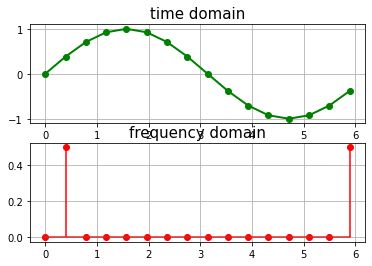

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 傅立叶变换
# 正弦信号
x = np.linspace(0, 2*np.pi, 16, endpoint=False)
print("时域采样", x)
y = np.sin(x)

N = len(x)
print("采样点个数：", N)

print("原始信号", y)
f = np.fft.fft(y)
print("频域信号", f/N)
frequency_domain_intensity = np.abs(f/N)
print("频域强度", frequency_domain_intensity)

iy = np.fft.ifft(f)
print("傅立叶变换恢复信号：", iy)
print("虚部", np.imag(iy))
print("实部", np.real(iy))
print("恢复信号与原始信号是否相同", np.allclose(np.real(iy), y))

plt.subplot(211)
plt.plot(x, y, 'g-', x, y, 'go', lw=2)
plt.title('time domain', fontsize=15)
plt.grid(True)

plt.subplot(212)
w = np.arange(N) * 2*np.pi / N
print("频率采样值", w)
plt.stem(w, frequency_domain_intensity, linefmt='r-', markerfmt='ro')
plt.title('frequency domain', fontsize=15)
plt.grid(True)
plt.show()

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


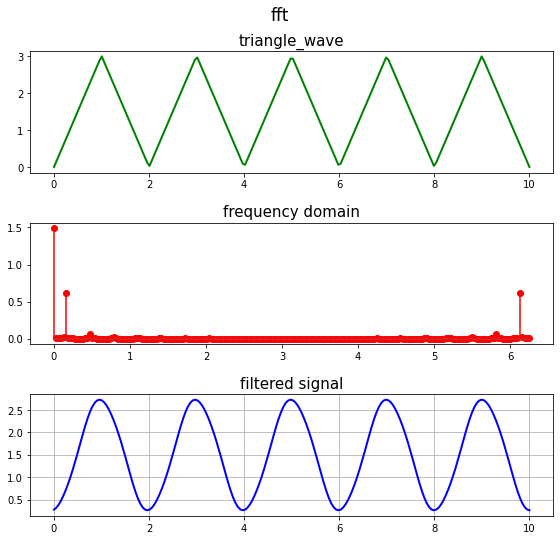

In [3]:
# 傅立叶变换
# 三角波
 
#三角波
def triangle_wave(x, c, h):
    """
    x: 横坐标
    c: 周期
    h: 最大振幅
    """
    res_x = x % c
    if res_x == 0: 
        y = 0
    elif res_x <= c / 2: # 上升段
        y = ((2 * h) / c ) * res_x
    else:  # 下降段
        y = ((-2 * h) / c ) * res_x + 2 * h
    return y
 
x=np.linspace(0,10,200)
y=np.array([triangle_wave(t, 2, 3) for t in x])
N = len(y)
f = np.fft.fft(y)
frequency_domain_intensity = np.abs(f/N)

# 滤波
f_real = np.real(f)
real_eps = 0.3 * f_real.max()
f_real[(f_real < real_eps) & (f_real > -real_eps)] = 0
f_imag = np.imag(f)
imag_eps = 0.3 * f_imag.max()
f_imag[(f_imag < imag_eps) & (f_imag > -imag_eps)] = 0
f1 = f_real + f_imag * 1j

# 逆傅立叶变换
y1 = np.fft.ifft(f1)
y1 = np.real(y1)

plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(x, y, 'g-', lw=2)
plt.title('triangle_wave', fontsize=15)

plt.subplot(312)
w = np.arange(N) * 2*np.pi / N
plt.stem(w, frequency_domain_intensity, linefmt='r-', markerfmt='ro')
plt.title('frequency domain', fontsize=15)

plt.subplot(313)
plt.plot(x, y1, 'b-', lw=2, markersize=4)
plt.title('filtered signal', fontsize=15)
plt.grid(True)

plt.tight_layout(1.5, rect=[0, 0.04, 1, 0.96])
plt.suptitle("fft", fontsize=17)
plt.show()
